# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:**  Arifin Nur Muhammad Haryadi
- **Email:** arifinnurmuhammad@gmail.com
- **ID Dicoding:** arifinnmh

# Menentukan Pertanyaan Bisnis

This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the Capital bike share system with the corresponding weather and seasonal information.

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

Pertanyaan bisnis :


1.   Bagaimana tren peminjaman sepeda berubah sepanjang waktu? Apakah ada pola musiman atau perubahan tahunan yang signifikan?
2.   Bagaimana cuaca memengaruhi jumlah peminjaman sepeda? Apakah cuaca buruk atau hari libur mempengaruhi pola peminjaman?
3.   Apakah terdapat perbedaan dalam pola peminjaman antara hari kerja dan akhir pekan?
4. Bagaimana suhu mempengaruhi tingkat peminjaman? Apakah orang lebih cenderung meminjam sepeda pada suhu tertentu?



## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install scikit-plot
!pip install dataprep
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 67.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.7 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252703 sha256=1cab76f91

In [ ]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk viusalisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

## Data Wrangling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Gathering Data

In [ ]:
import pandas as pd
from pandas import ExcelFile

In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/Dicoding/dataset/day.csv')
day_df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [ ]:
hour_df = pd.read_csv('/content/drive/MyDrive/Dicoding/dataset/hour.csv')
hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [ ]:
# Eksplorasi data all_df

all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)

all_df.columns = all_df.columns.str.replace('_x', '').str.replace('_y', '')

all_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("jumlah duplikasi: ", day_df.duplicated().sum())

jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [ ]:
# dteday diubah tipe data menjadi datetime pada day_df
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# dteday diubah tipe data menjadi datetime pada hour_df

datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

In [ ]:
# Konversi kolom 'dteday' ke dalam format datetime
all_df['dteday'] = pd.to_datetime(all_df['dteday'])

# Menambahkan kolom baru untuk tahun dan bulan
all_df['tahun'] = all_df['dteday'].dt.year
all_df['bulan'] = all_df['dteday'].dt.month

# Membuat pivot table
pivot_table = pd.pivot_table(all_df, values='cnt', index='bulan', columns='tahun', aggfunc='sum')

# Menampilkan pivot table
print(pivot_table)


tahun     2011     2012    2011    2012
bulan                                  
1       870969  2313372   38189   96744
2      1119397  2462764   48215  103137
3      1511511  3952089   64045  164875
4      2273532  4170578   94870  174224
5      3259704  4700760  135821  195865
6      3444288  4867920  143512  202830
7      3392184  4886568  141341  203607
8      3243556  5148072  136691  214503
9      3048767  5245752  127418  218573
10     2961840  4757430  123511  198841
11     2448141  3653298  102167  152664
12     2091379  2967179   87323  123713


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda berubah sepanjang waktu? Apakah ada pola musiman atau perubahan tahunan yang signifikan?

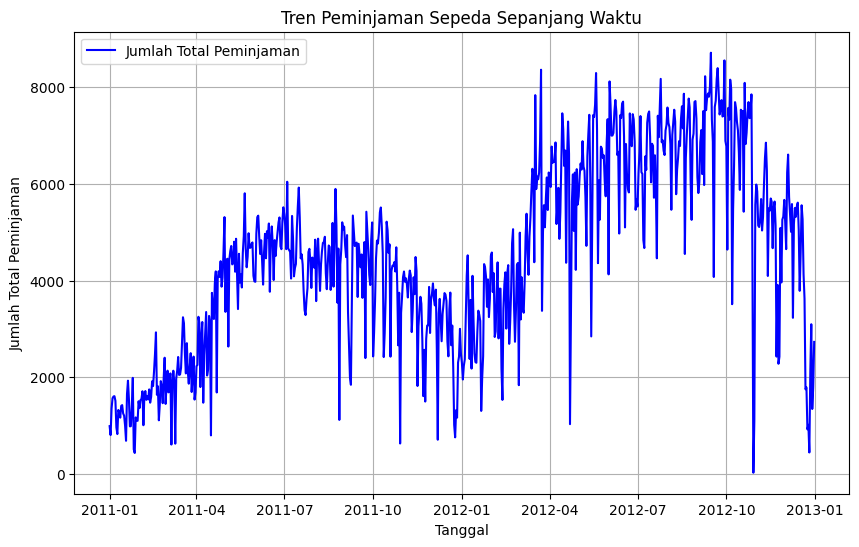

In [ ]:
# Mengurutkan data berdasarkan tanggal
day_df = day_df.sort_values(by='dteday')

# Membuat grafik garis untuk menunjukkan tren peminjaman sepeda
plt.figure(figsize=(10, 6))
plt.plot(day_df['dteday'], day_df['cnt'], label='Jumlah Total Peminjaman', color='blue')
plt.title('Tren Peminjaman Sepeda Sepanjang Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Total Peminjaman')
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana cuaca memengaruhi jumlah peminjaman sepeda? Apakah cuaca buruk atau hari libur mempengaruhi pola peminjaman?

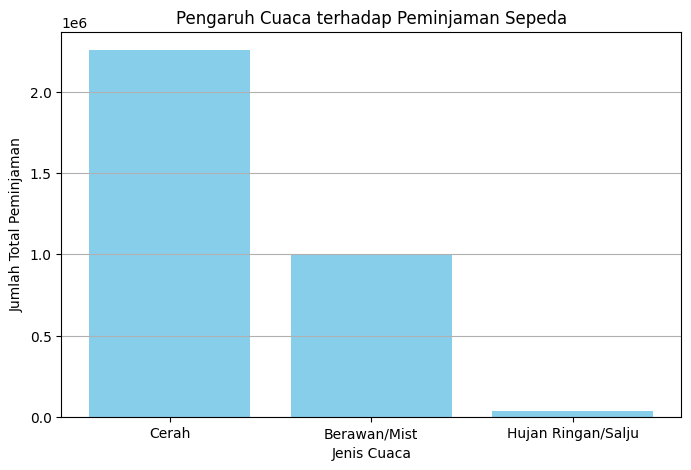

In [ ]:
# Membuat data agregat berdasarkan jenis cuaca
cuaca_agregat = day_df.groupby('weathersit')['cnt'].sum().reset_index()

# Mengganti label cuaca dengan keterangan yang lebih jelas
cuaca_agregat['weathersit'] = cuaca_agregat['weathersit'].replace({
    1: 'Cerah',
    2: 'Berawan/Mist',
    3: 'Hujan Ringan/Salju',
    4: 'Hujan Lebat/Salju'
})

# Membuat grafik batang untuk menunjukkan pengaruh cuaca terhadap peminjaman sepeda
plt.figure(figsize=(8, 5))
plt.bar(cuaca_agregat['weathersit'], cuaca_agregat['cnt'], color='skyblue')
plt.title('Pengaruh Cuaca terhadap Peminjaman Sepeda')
plt.xlabel('Jenis Cuaca')
plt.ylabel('Jumlah Total Peminjaman')
plt.grid(axis='y')
plt.show()

### Pertanyaan 3: Apakah terdapat perbedaan dalam pola peminjaman antara hari kerja dan akhir pekan?

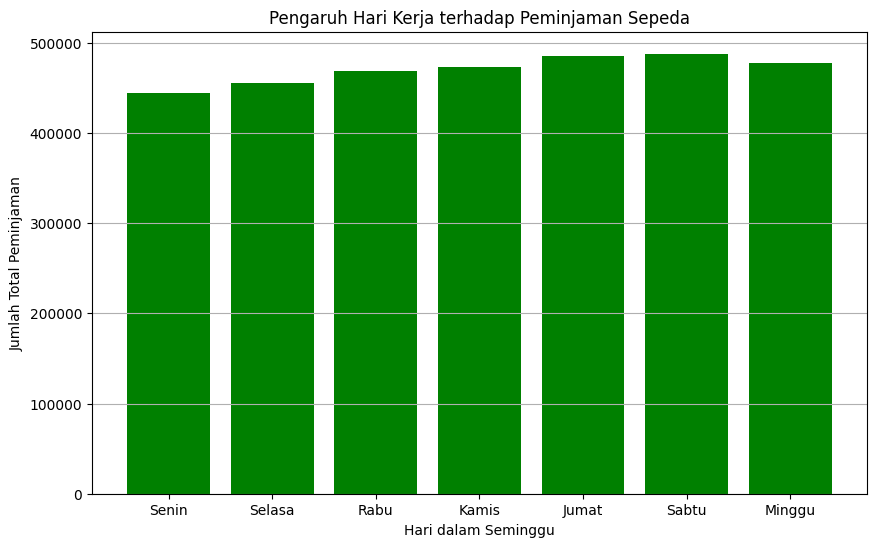

In [ ]:
# Membuat data agregat berdasarkan hari kerja
hari_kerja_agregat = day_df.groupby('weekday')['cnt'].sum().reset_index()

# Mengganti label hari dalam seminggu dengan keterangan yang lebih jelas
hari_kerja_agregat['weekday'] = hari_kerja_agregat['weekday'].replace({
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
})

# Membuat grafik batang atau garis untuk menunjukkan pengaruh hari kerja terhadap peminjaman sepeda
plt.figure(figsize=(10, 6))
plt.bar(hari_kerja_agregat['weekday'], hari_kerja_agregat['cnt'], color='green')
plt.title('Pengaruh Hari Kerja terhadap Peminjaman Sepeda')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Total Peminjaman')
plt.grid(axis='y')
plt.show()


### Pertanyaan 4: Bagaimana suhu mempengaruhi tingkat peminjaman? Apakah orang lebih cenderung meminjam sepeda pada suhu tertentu?

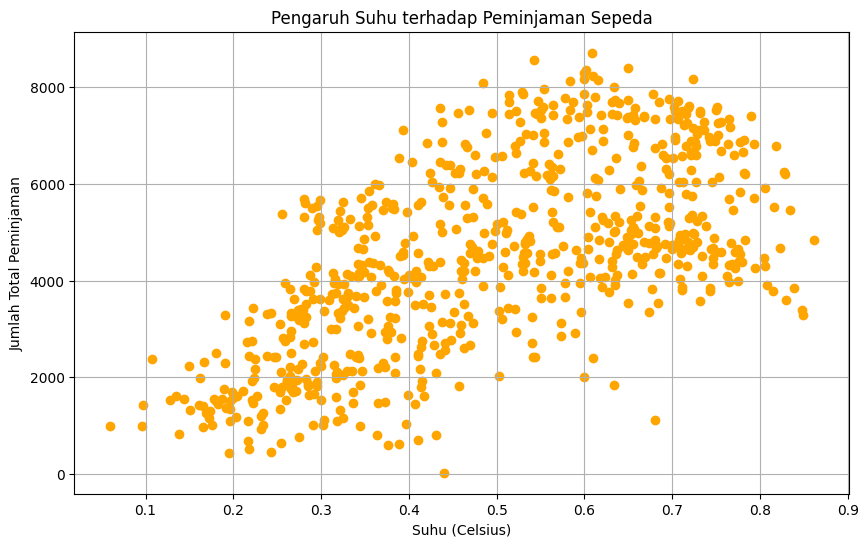

In [ ]:
# Membuat grafik pencar untuk menunjukkan hubungan antara suhu dan peminjaman sepeda
plt.figure(figsize=(10, 6))
plt.scatter(day_df['temp'], day_df['cnt'], color='orange')
plt.title('Pengaruh Suhu terhadap Peminjaman Sepeda')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Total Peminjaman')
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : tren peminjaman sepeda mengalami perubahan pada tiap bulan dalam sepanjang tahun. tren yang terjadi pada rentang 2011 dan 2012 mengalami peningkatan. bulan pertengahan adalah puncak jumlah tertinggi peminjaman sepeda pada tiap tahunnya.

- Conclution pertanyaan 2 : Cuaca memiliki pengaruh dalam jumlah peminjaman sepeda. cuaca cerah meningkatkan jumlah peminjaman sepeda, sedangkan pada cuaca berawan dan hujan/salju jumlah peminjaman sepeda menurun

- Conclution pertanyaan 3 : Hari kerja dan akhir pekan tidak mempengaruhi pola peminjaman sepeda dan relatif stabil

- Conclution pertanyaan 4 : Pada plot scatter, suhu mempengaruhi tingkat peminjaman sepeda. konsumen cenderung melakukan peminjaman sepeda pada suhu hangat menuju panas

In [ ]:
all_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
all_df.to_csv("all_data.csv", index=False)

# Streamlit

In [ ]:
# Struktur running streamlit on google collaboratory

# pip install streamlit - 1
# syntax web - 2
# wget - 3
# streamlit run on localtunnel - 4

In [ ]:
# Streamlit - 1
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Streamlit - 3
!wget -q -O - ipv4.icanhazip.com


34.86.169.42


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV atau sumber data lainnya
all_df = pd.read_csv('all_data.csv')

# Menampilkan judul dashboard
st.title('Dashboard Analisis Data Peminjaman Sepeda')

# Visualisasi 1: Tren Peminjaman Sepeda sepanjang Waktu
fig1, ax1 = plt.subplots()
ax1.plot(all_df['dteday'], all_df['cnt'], label='Jumlah Total Peminjaman', color='blue')
ax1.set_title('Tren Peminjaman Sepeda Sepanjang Waktu')
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Jumlah Total Peminjaman')
ax1.legend()
st.pyplot(fig1)

st.markdown("tren peminjaman sepeda mengalami perubahan pada tiap bulan dalam sepanjang tahun. tren yang terjadi pada rentang 2011 dan 2012 mengalami peningkatan. bulan pertengahan adalah puncak jumlah tertinggi peminjaman sepeda pada tiap tahunnya.")

# Visualisasi 2: Pengaruh Cuaca terhadap Peminjaman Sepeda
cuaca_agregat = all_df.groupby('weathersit')['cnt'].sum().reset_index()
cuaca_agregat['weathersit'] = cuaca_agregat['weathersit'].replace({
    1: 'Cerah',
    2: 'Berawan/Mist',
    3: 'Hujan Ringan/Salju',
    4: 'Hujan Lebat/Salju'
})
fig2, ax2 = plt.subplots()
ax2.bar(cuaca_agregat['weathersit'], cuaca_agregat['cnt'], color='skyblue')
ax2.set_title('Pengaruh Cuaca terhadap Peminjaman Sepeda')
ax2.set_xlabel('Jenis Cuaca')
ax2.set_ylabel('Jumlah Total Peminjaman')
st.pyplot(fig2)

st.markdown("Cuaca memiliki pengaruh dalam jumlah peminjaman sepeda. cuaca cerah meningkatkan jumlah peminjaman sepeda, sedangkan pada cuaca berawan dan hujan/salju jumlah peminjaman sepeda menurun")

# Visualisasi 3: Pengaruh Hari Kerja terhadap Peminjaman Sepeda
hari_kerja_agregat = all_df.groupby('weekday')['cnt'].sum().reset_index()
hari_kerja_agregat['weekday'] = hari_kerja_agregat['weekday'].replace({
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
})
fig3, ax3 = plt.subplots()
ax3.bar(hari_kerja_agregat['weekday'], hari_kerja_agregat['cnt'], color='green')
ax3.set_title('Pengaruh Hari Kerja terhadap Peminjaman Sepeda')
ax3.set_xlabel('Hari dalam Seminggu')
ax3.set_ylabel('Jumlah Total Peminjaman')
st.pyplot(fig3)

st.markdown("Hari kerja dan akhir pekan tidak mempengaruhi pola peminjaman sepeda dan relatif stabil")

# Visualisasi 4: Pengaruh Suhu terhadap Peminjaman Sepeda
fig4, ax4 = plt.subplots()
ax4.scatter(all_df['temp'], all_df['cnt'], color='orange')
ax4.set_title('Pengaruh Suhu terhadap Peminjaman Sepeda')
ax4.set_xlabel('Suhu (Celsius)')
ax4.set_ylabel('Jumlah Total Peminjaman')
st.pyplot(fig4)

st.markdown("Pada plot scatter, suhu mempengaruhi tingkat peminjaman sepeda. konsumen cenderung melakukan peminjaman sepeda pada suhu hangat menuju panas")


Writing app.py


In [ ]:
# Streamlit - 4
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.169.42:8501

npx: installed 22 in 4.187s
your url is: https://cool-maps-brush.loca.lt
  Stopping...
^C
